In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df = pd.read_csv('tweet_data.csv')
df.head()

,target,id,date,user,text
0,1,2184554517,Mon Jun 15 16:04:49 PDT 2009,KaylaMKennedy,I Have Something Good In My Life And Just Want...
1,1,2190235860,Tue Jun 16 02:09:10 PDT 2009,heidischall,Back online
2,1,2186625882,Mon Jun 15 19:06:18 PDT 2009,steveken,@NathanFillion What about apartment building m...
3,1,1972918422,Sat May 30 10:07:54 PDT 2009,duckydynamo,"@Coombsy1989 they announced fable 3... sorta,"
4,0,2201410519,Tue Jun 16 20:14:13 PDT 2009,Isa_483,"@iamizzap i know, i feel bad for the leak too...."


For sentiment analysis i dont need to have id,date,user columns they are unrelevant to determine positive or negative tweets.

In [38]:
df.drop(columns=['id','date','user'], inplace=True)

In [39]:
df.head()

,target,text
0,1,I Have Something Good In My Life And Just Want...
1,1,Back online
2,1,@NathanFillion What about apartment building m...
3,1,"@Coombsy1989 they announced fable 3... sorta,"
4,0,"@iamizzap i know, i feel bad for the leak too...."


In [40]:
df.tail()

,target,text
239995,0,im still melting and im in the house in the sh...
239996,0,Back in bed with allergy eyes and a very unhap...
239997,1,@Twattwitt Bonjour
239998,1,yay no school for me today on both schools 1...
239999,1,@ebunce haha you have the same name as me lol.


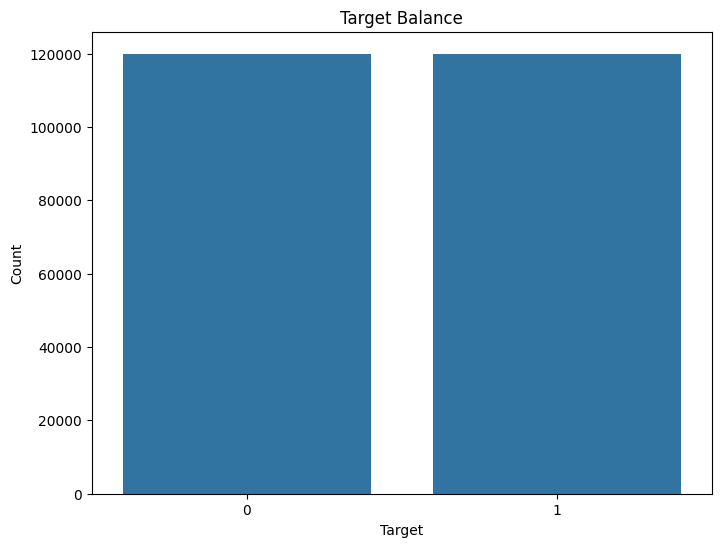

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=df)
plt.title('Target Balance')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [42]:
for i in range(3):
    print(df['text'][i] + "\n")


I Have Something Good In My Life And Just Want Ladies To Know Take Your Time Theres Some Good Brothas Out There.  I Have Proof!   

Back online 

@NathanFillion What about apartment building maintenance guys? (Or was Johnny just a part time repair guy?)  



I can see the some of the texts may have unrelevant words that i can omit out of the data

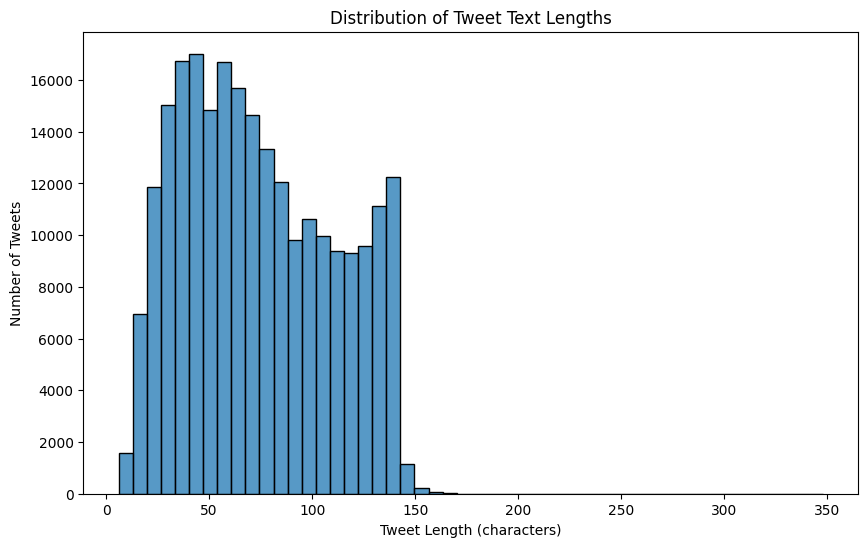

Number of tweets with URLs: 10535
Number of tweets with mentions (@): 112000
Number of tweets with hashtags (#): 5559


In [43]:
df['text_length'] = df['text'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Tweet Text Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Number of Tweets')
plt.show()

print("Number of tweets with URLs:", df['text'].str.contains('http').sum())
print("Number of tweets with mentions (@):", df['text'].str.contains('@').sum())
print("Number of tweets with hashtags (#):", df['text'].str.contains('#').sum())



## Data preparation

### Subtask:
Prepare the tweet text data for feature engineering by tokenizing it.


In [47]:
import re
import nltk
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt_tab')
nltk.download('punkt')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation + '!?'))
    tokens = word_tokenize(text)
    return tokens


df['tokens'] = df['text'].apply(clean_and_tokenize)
display(df.head())

,target,text,text_length,tokens
0,1,I Have Something Good In My Life And Just Want...,130,"[i, have, something, good, in, my, life, and, ..."
1,1,Back online,12,"[back, online]"
2,1,@NathanFillion What about apartment building m...,109,"[what, about, apartment, building, maintenance..."
3,1,"@Coombsy1989 they announced fable 3... sorta,",46,"[they, announced, fable, 3, sorta]"
4,0,"@iamizzap i know, i feel bad for the leak too....",103,"[i, know, i, feel, bad, for, the, leak, too, i..."


In [49]:
for i in range(3):
    print(df['text'][i] + "\n")

for i in range(3):
  for j in range(len(df['tokens'][i])):
    print(df['tokens'][i][j])



I Have Something Good In My Life And Just Want Ladies To Know Take Your Time Theres Some Good Brothas Out There.  I Have Proof!   

Back online 

@NathanFillion What about apartment building maintenance guys? (Or was Johnny just a part time repair guy?)  

i
have
something
good
in
my
life
and
just
want
ladies
to
know
take
your
time
theres
some
good
brothas
out
there
i
have
proof
back
online
what
about
apartment
building
maintenance
guys
or
was
johnny
just
a
part
time
repair
guy


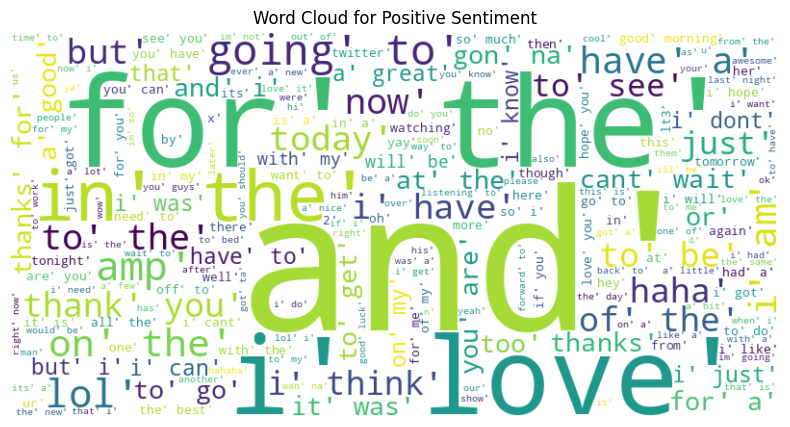

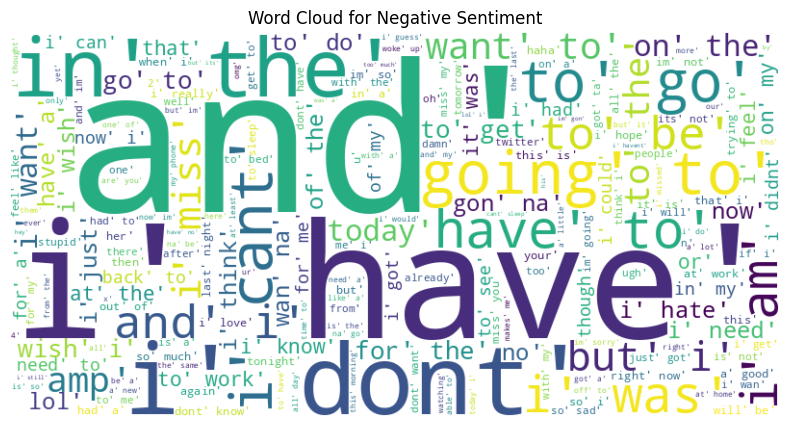

In [50]:
from wordcloud import WordCloud

def generate_wordcloud(data, label, title):

    text = ' '.join(data[data['target'] == label]['tokens'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


generate_wordcloud(df, 1, "Word Cloud for Positive Sentiment")
generate_wordcloud(df, 0, "Word Cloud for Negative Sentiment")

In [51]:
custom_words = ['amp','and','today','love','have','lol','m']

In [52]:
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

def remove_stopwords(tokens): # Changed 'text' to 'tokens' to reflect the input
    stop_words = set(stopwords.words('english'))

    negated_words = ["don't", "doesn't", "didn't", "won't", "wouldn't", "can't", "couldn't", "shouldn't", "mustn't", "shan't", "aren't", "isn't", "haven't", "hasn't", "hadn't",  "wasn't", "weren't", "mightn't", "needn't"]
    stop_words = [word for word in stop_words if word not in negated_words]

    stop_words.extend(custom_words)
    filtered_words = [word for word in tokens if word.lower() not in stop_words] # Iterating through 'tokens'
    return filtered_words

df['tokens'] = df['tokens'].apply(remove_stopwords) # Applying the modified function

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [53]:
df.head(20)

,target,text,text_length,tokens
0,1,I Have Something Good In My Life And Just Want...,130,"[something, good, life, want, ladies, know, ta..."
1,1,Back online,12,"[back, online]"
2,1,@NathanFillion What about apartment building m...,109,"[apartment, building, maintenance, guys, johnn..."
3,1,"@Coombsy1989 they announced fable 3... sorta,",46,"[announced, fable, 3, sorta]"
4,0,"@iamizzap i know, i feel bad for the leak too....",103,"[know, feel, bad, leak, cant, wait, songs, rea..."
5,1,on our way to kean!! w00t,26,"[way, kean, w00t]"
6,1,"@HaidaFauzi wah, topaz ring - in blue? said to...",97,"[wah, topaz, ring, blue, said, promote, good, ..."
7,1,"Costco, the Getty, THREE HOURS of traffic, tac...",94,"[costco, getty, three, hours, traffic, taco, m..."
8,0,@toddzelin What's wrong with her? She going t...,56,"[whats, wrong, going, okay]"
9,1,@babygirlparis Have fun! Have u seen yourself ...,134,"[fun, u, seen, show, begining, act, interview]"


In [56]:
# Drop rows with empty tokens
df = df[df['tokens'].apply(len) > 0]